In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from mnist import MNIST

mndata = MNIST(r"C:\Users\Kacper\sample")

digits, labels = mndata.load_training()
digits_train=np.array(digits)
digits_label_train=np.array(labels)
digits_test,digits_label_test= mndata.load_testing()
digits_test=np.array(digits_test)
digits_label_test=np.array(digits_label_test)

## Zadaniedomowe
–Przepiszkodmnist_1nn.jl do Pythona

–Liczba punktów(można użyć maksymalnie 4 CPU):

10 / czaswykonaniaprognozyw minutach

*Ustawienia procesorów nie były zmieniane w trakcie trwania eksperymentów*

Tak przedstawia się czas wykorzystując julia (ustawienia procesorów nie były zmieniane w trakcie trwania eksperymentów)

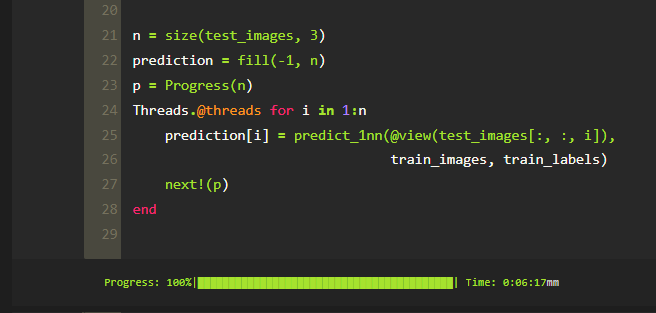

# Wariant 1 - dokładne odwzorowanie
W pierwszym wariancie kod julia jest odwzorowany w pythonie (z zachowaniem założeń wątków)

Obliczenia dla 1% docelowej liczby predykcji

@Funkcja wyliczająca dystans wsparta numpy

In [39]:
def predict_1nn(img, train_images=digits_train, train_labels=digits_label_train):
    best_img = -1
    best_distance = float("inf")    
    for i,comparision in enumerate(train_images):
        cur_distance = distance_value(img,comparision)
        if cur_distance < best_distance:
            best_distance = cur_distance
            best_img = i
    return train_labels[best_img]

In [8]:
def distance_value(actual_img,compare_img):
    return ((actual_img-compare_img)**2).sum()

In [36]:
import time
y_dash=[]
# get the start time
st = time.process_time()

from concurrent.futures import ThreadPoolExecutor

with ThreadPoolExecutor(max_workers=len(digits_test[0:100])) as executor:
    for i in digits_test[0:100]:
        executor.submit(y_dash.append(predict_1nn(i,digits_train,digits_label_train)), i)

# wait for 1 second
time.sleep(1)

# get the end time
et = time.process_time()

# get execution time
res = et - st
print('CPU Execution time:', res, 'seconds')

CPU Execution time: 44.6875 seconds


# Wariant 1b - odwzorowanie bez wątków
Ten sam wariant z pominięciem wątków

Obliczenia dla 1% docelowej liczby predykcji

In [40]:
import time

# get the start time
st = time.process_time()

y_dash=[predict_1nn(i,digits_train,digits_label_train) for i in digits_test[0:100]]
# wait for 1 second
time.sleep(1)

# get the end time
et = time.process_time()

# get execution time
res = et - st
print('CPU Execution time:', res, 'seconds')

CPU Execution time: 45.109375 seconds


# Wariant 2 - szerokie zastosowanie numpy
W tym wariancie mocno posiłkowano się możliwościami numpy (napisane w C)

Kod osiąga to samo założenie, ale nie jest jednoznacznym "przepisaniem"

Obliczenia dla 1% docelowej liczby predykcji

Zastosowano mapowanie oraz pętle for

In [41]:
def t_predict_1nn(img,  train_images=digits_train, train_labels=digits_label_train):
    return train_labels[np.argmin(np.sum(np.abs((train_images-img)),axis=1))]

In [43]:
import time

# get the start time
st = time.process_time()

y_dash= list(map(t_predict_1nn,digits_test[0:100,]))

# wait for 3 seconds
time.sleep(1)

# get the end time
et = time.process_time()

st_2 = time.process_time()
for i in range(100):
    t_predict_1nn(digits_test[i],digits_train,digits_label_train),digits_label_test[i]
et_2 = time.process_time()
# get execution time
res = et - st
res2=et_2-st_2
print('map - CPU Execution time:', res, 'seconds')
print('fot_loop - CPU Execution time:', res2, 'seconds')

map - CPU Execution time: 23.96875 seconds
fot_loop - CPU Execution time: 24.390625 seconds


# Wariant 3 - zastosowanie ekwiwalentu - sklearn
Ostatni eksperyment wykorzystuje gotowy algorytm zaimplementowany w pakiecie sklearn

Obliczenia dla PEŁNEJ predykcji


In [49]:
import time

# get the start time
st = time.process_time()

neigh = KNeighborsClassifier(n_neighbors=1,algorithm="brute")
neigh.fit(digits_train,digits_label_train)
y_dash= neigh.predict(digits_test)

# wait for 3 seconds
time.sleep(1)

# get the end time
et = time.process_time()

# get execution time
res = et - st
print('CPU Execution time:', res, 'seconds')

CPU Execution time: 67.90625 seconds


In [47]:
print("Skuteczność algorytmów:",np.equal(np.array(y_dash),np.array(digits_label_test)).sum()/np.array(digits_label_test).shape[0])

Skuteczność algorytmów: 0.9691


Przy założeniu miary CPU processing time (not wall clock time)

|julia   |python(part numpy)   |python(full numpy)   |python(sklearn)   |python(pure)  |
|---|---|---|---|---|
| ~360s  | ~4400s  | ~2350s  | 67s  |  A LOT ∞  |


In [ ]:
#python_time ~=  12*julia_time
#julia_score_max = 2pkt
#python_score_recode_max = 1/4 pkt
#python_score_sklearn_max = 10pkt

# Najlepszy uzyskany rezultat

In [22]:
st_normal = time.time()

neigh = KNeighborsClassifier(n_neighbors=1,algorithm="brute")
neigh.fit(digits_train,digits_label_train)
y_dash= neigh.predict(digits_test)

# wait for 3 seconds
time.sleep(3)


# get the end time
et_normal = time.time()

# get the execution time
elapsed_time = et_normal - st_normal
print('Execution time:', elapsed_time, 'seconds')

Execution time: 29.432461977005005 seconds
